# Лабораторная работа №4
# по численным методам
## Выполнила: Хренникова Ангелина 
## Группа: М8О-308Б-19
### Вариант: 20


Задача: Реализовать методы Эйлера, Рунге-Кутты и Адамса 4-го порядка в виде программ, задавая в качестве входных данных шаг сетки  h. С использованием разработанного программного обеспечения решить задачу Коши для ОДУ 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import deepcopy

In [2]:
class Matrix:
    def __init__(self, matrix):
        self.matrix = deepcopy(matrix)
        self.size = self._Size()
        
    def __str__(self):
        return '\n'.join([''.join(['%f\t' % i for i in row]) for
                          row in self.matrix])
    
    def __getitem__(self, index):
        return self.matrix[index]
    
    def _Size(self):
        rows = len(self.matrix)
        cols = 0
        for row in self.matrix:
            if (type(row) == int) | (type(row) == float):
                break
            if len(row) > cols:
                cols = len(row)
        return (rows, cols)

In [3]:
def Progonka(A, b):
    if (A.size[0] != A.size[1]) | (A.size[0] != len(b)):
        raise Exception("Система имеет бесконечное число решений")   
    X = [0] * A.size[0]
    P = [0] * A.size[0]
    Q = [0] * A.size[0]
    P[0] = -A.matrix[0][1] / A.matrix[0][0]
    Q[0] = b[0] / A.matrix[0][0]
    for i in range(1, A.size[0]):
        if i != A.size[0] - 1:
            P[i] = -A.matrix[i][i + 1] / (A.matrix[i][i] + P[i - 1] * A.matrix[i][i - 1])
        else:
            P[i] = 0
        Q[i] = (b[i] - Q[i - 1] * A.matrix[i][i - 1]) / (A.matrix[i][i] + P[i - 1] * A.matrix[i][i - 1])
    for i in range(A.size[0] - 1, -1, -1):
        if i != A.size[0] - 1:
            X[i] = X[i + 1] * P[i] + Q[i]
        else:
            X[i] = Q[i]
    return X

In [4]:
def f(x):
    return abs(x)**(3/2)

In [5]:
def dy(x):
    return 3*x/(2*(abs(x)**(1/2)))

In [6]:
def ddy(x):
    return 3*x**2/(4*abs(x)**(5/2))

In [7]:
def dz(x, y, z):
    return (3/4*y-1/2*z)/(x-1)/x

In [8]:
def eps(x, y, f=f):
    return sum([(y[i] - f(x[i])) ** 2 for i in range(len(x))]) ** 0.5

def d_eps(x, z, dy=dy):
    return sum([(z[i] - dy(x[i])) ** 2 for i in range(len(x))]) ** 0.5

In [9]:
def RRR(y1, y2, h1, h2, p):
    if h1 < h2:
        return (sum([(y1[i * 2] - y2[i]) ** 2 for i in range(len(y2))]) ** 0.5) / ((h2 / h1) ** p - 1)
    return (sum([(y1[i] - y2[i * 2]) ** 2 for i in range(len(y1))]) ** 0.5) / ((h1 / h2) ** p - 1)

In [10]:
def Eiler(f=dz, y0=2**(3/2), z0=1.5*2**(1/2), h=0.1, a=2, b=3):
    x = np.arange(a, b + h, h)
    y = [y0]
    z = [z0]
    
    for i in range(1, len(x)):
        y.append(y[i - 1] + h * z[i - 1])
        z.append(z[i - 1] + h * f(x[i - 1], y[i - 1], z[i - 1]))
    return x, y, z

In [11]:
x1, y1, z1 = Eiler()
eps1 = eps(x1, y1)
eps2 = d_eps(x1, z1)
print("Погрешность явного метода Эйлера относительно точного решения: {}".format(eps1))
print("Погрешность явного метода Эйлера относительно первой производной: {}".format(eps2))
print()
x2, y2, z2 = Eiler(h=0.05)
print("Погрешность по Рунге-Ромбергу-Ридчардсону явного метода Эйлера отнисительно точного решения: {}".format(RRR(y1, y2, 0.1, 0.05, 2)))
print("Погрешность по Рунге-Ромбергу-Ридчардсону явного метода Эйлера относительно первой производной: {}".format(RRR(z1, z2, 0.1, 0.05, 2)))

Погрешность явного метода Эйлера относительно точного решения: 0.04511928152482982
Погрешность явного метода Эйлера относительно первой производной: 0.00667773803942419

Погрешность по Рунге-Ромбергу-Ридчардсону явного метода Эйлера отнисительно точного решения: 0.007543564771378575
Погрешность по Рунге-Ромбергу-Ридчардсону явного метода Эйлера относительно первой производной: 0.001153251613096737


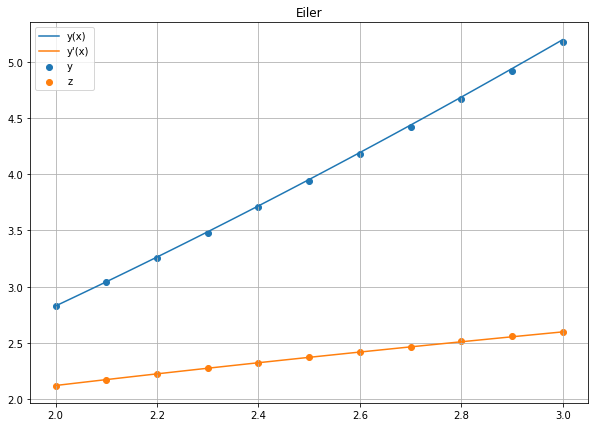

In [12]:
a = 2
b = 3
dx = 0.01

xarr = np.arange(a, b + dx, dx)
ylist = [f(x_) for x_ in xarr]
dylist = [dy(x_) for x_ in xarr]

plt.figure(figsize=(10,7))
plt.title('Eiler')
plt.plot(xarr, ylist)
plt.scatter(x1, y1)
plt.plot(xarr, dylist)
plt.scatter(x1, z1)
plt.legend(['y(x)', "y'(x)", 'y', 'z'])
plt.grid()
plt.show()

In [13]:
def delta(f, xk, yk, zk, h, flag):
    K1 = h * zk
    L1 = h * f(xk, yk, zk)

    K2 = h * (zk + 0.5 * L1)
    L2 = h * f(xk + 0.5 * h, yk + 0.5 * K1, zk + 0.5 * L1)
    
    K3 = h * (zk + 0.5 * L2)
    L3 = h * f(xk + 0.5 * h, yk + 0.5 * K2, zk + 0.5 * L2)
    
    K4 = h * (zk + L3)
    L4 = h * f(xk + h, yk + K3, zk + L3)
    
    if flag == True:
        return (K1 + 2 * K2 + 2 * K3 + K4) / 6
    return (L1 + 2 * L2 + 2 * L3 + L4) / 6

In [14]:
def Runge_Kutta_4(f=dz, y0=2**(3/2), z0=(3/2)*2**(1/2), h=0.1, a=2, b=3):
    x = np.arange(a, b + h, h)
    y = [y0]
    z = [z0]
    
    for i in range(1, len(x)):
        y.append(y[i - 1] + delta(f, x[i - 1], y[i - 1], z[i - 1], h, True))
        z.append(z[i - 1] + delta(f, x[i - 1], y[i - 1], z[i - 1], h, False))
    return x, y, z

In [15]:
x1, y1, z1 = Runge_Kutta_4()
eps1 = eps(x1, y1)
eps2 = d_eps(x1, z1)
print("Погрешность метода Рунге-Кутты 4 порядка относительно точного решения: {}".format(eps1))
print("Погрешность метода Рунге-Кутты 4 порядка относительно первой производной: {}".format(eps2))
print()
x2, y2, z2 = Runge_Kutta_4(h=0.05)
print("Погрешность по Рунге-Ромбергу-Ридчардсону метода Рунге-Кутты 4 порядка относительно точного решения: {}".format(RRR(y1, y2, 0.1, 0.05, 2)))
print("Погрешность по Рунге-Ромбергу-Ридчардсону явного метода Рунге-Кутты 4 порядка относительно первой производной: {}".format(RRR(z1, z2, 0.1, 0.05, 2)))


Погрешность метода Рунге-Кутты 4 порядка относительно точного решения: 1.088406322299819e-07
Погрешность метода Рунге-Кутты 4 порядка относительно первой производной: 2.6635582080361758e-08

Погрешность по Рунге-Ромбергу-Ридчардсону метода Рунге-Кутты 4 порядка относительно точного решения: 3.4013242426419546e-08
Погрешность по Рунге-Ромбергу-Ридчардсону явного метода Рунге-Кутты 4 порядка относительно первой производной: 8.323588689609032e-09


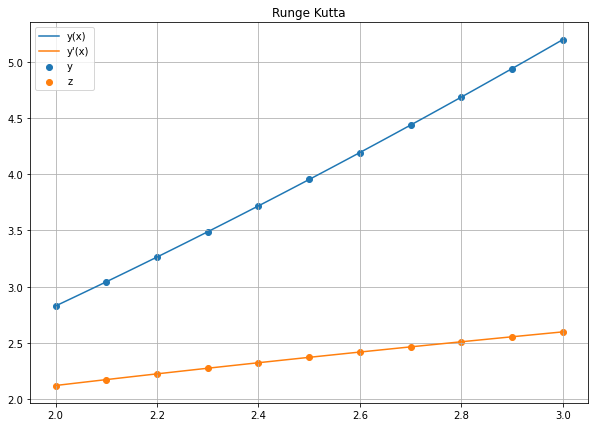

In [16]:
plt.figure(figsize=(10,7))
plt.title('Runge Kutta')
plt.plot(xarr, ylist)
plt.scatter(x1, y1)
plt.plot(xarr, dylist)
plt.scatter(x1, z1)
plt.legend(['y(x)', "y'(x)", 'y', 'z'])
plt.grid()
plt.show()

In [17]:
def Adams_4(f=dz, y0=2**1.5, z0=1.5*2**0.5, h=0.1, a=2, b=3):
    x, y, z = Runge_Kutta_4(f, y0, z0, h, a, b)
    y = y[:4]
    z = z[:4]
    for k in range(4, len(x)):
        y.append(y[k - 1] + (h / 24) * (55 * z[k - 1] - 59 * z[k - 2] + 37 * z[k - 3] - 9 * z[k - 4]))
        z.append(z[k - 1] + (h / 24) * (55 * f(x[k - 1], y[k - 1], z[k - 1]) - 59 * f(x[k - 2], y[k - 2], z[k - 2]) + 37 * f(x[k - 3], y[k - 3], z[k - 3]) - 9 * f(x[k - 4], y[k - 4], z[k - 4])))
    return x, y, z

In [18]:
x1, y1, z1 = Adams_4()
eps1 = eps(x1, y1)
eps2 = d_eps(x1, z1)
print("Погрешность метода Адамса 4 порядка относительно точного решения: {}".format(eps1))
print("Погрешность метода Адамса 4 порядка относительно первой производной: {}".format(eps2))
print()
x2, y2, z2 = Adams_4(h=0.05)
print("Погрешность по Рунге-Ромбергу-Ридчардсону метода Адамса 4 порядка относительно точного решения: {}".format(RRR(y1, y2, 0.1, 0.05, 2)))
print("Погрешность по Рунге-Ромбергу-Ридчардсону метода Адамса 4 порядка относительно первой производной: {}".format(RRR(z1, z2, 0.1, 0.05, 2)))

Погрешность метода Адамса 4 порядка относительно точного решения: 1.6548148765789392e-06
Погрешность метода Адамса 4 порядка относительно первой производной: 3.82448003932271e-06

Погрешность по Рунге-Ромбергу-Ридчардсону метода Адамса 4 порядка относительно точного решения: 5.146314803706755e-07
Погрешность по Рунге-Ромбергу-Ридчардсону метода Адамса 4 порядка относительно первой производной: 1.168170503979643e-06


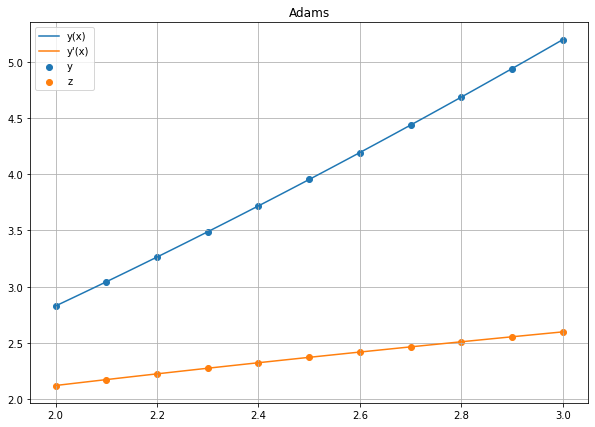

In [19]:
plt.figure(figsize=(10,7))
plt.title('Adams')
plt.plot(xarr, ylist)
plt.scatter(x1, y1)
plt.plot(xarr, dylist)
plt.scatter(x1, z1)
plt.legend(['y(x)', "y'(x)", 'y', 'z'])
plt.grid()
plt.show()

Задача: Реализовать метод стрельбы и конечно-разностный метод решения краевой задачи для ОДУ в виде программ. С использованием разработанного программного обеспечения решить краевую задачу для обыкновенного дифференциального уравнения 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 

In [20]:
def f(x):
    return 2*x+1+math.exp(2*x)

In [21]:
def dy(x):
    return 2*math.exp(2*x)+2

In [22]:
def ddy(x):
    return 4*math.exp(2*x)

In [23]:
def dz(x, y, z):
    if (x==0): 
        return 0
    else: 
        return ((2*x+1)*z-2*y)/x

In [24]:
def shooting(f=dz, y0=2, yn=10.389, h=0.1, a=0, b=1, eps=0.0001, n0=None, n=None):
    if n == None:
        n = random.uniform(0, 1)
    if n0 == None:
        n0 = abs(n - random.uniform(0, 1))        
    k = 0
    while True:
        k += 1
        x_, y_, z_ = Runge_Kutta_4(f=f, y0=y0, z0=n0, h=h, a=a, b=b)
        x, y, z = Runge_Kutta_4(f=f, y0=y0, z0=n, h=h, a=a, b=b)
        e = abs(y[-1] - yn)
        if e <= eps:
            break
        temp = n
        n = n - (y[-1] - yn) * (n - n0) / ((y[-1] - yn) - (y_[-1] - yn))
        n0 = temp
    return x, y, z, k, e

In [25]:
x1, y1, z1, k, epsilon = shooting()
eps1 = eps(x1, y1, f)
eps2 = d_eps(x1, z1, dy)
print("Погрешность метода стрельбы относительно точного решения: {}".format(eps1))
print("Погрешность метода стрельбы относительно первой производной: {}".format(eps2))
print("Количество итераций метода стрельбы: {}".format(k))
print("Эпсилон метода стрельбы: {}".format(epsilon))
print()
x2, y2, z2, k, epsilon = shooting(h=0.05)
print("Погрешность по Рунге-Ромбергу-Ридчардсону метода стрельбы относительно точного решения: {}".format(RRR(y1, y2, 0.1, 0.05, 2)))
print("Погрешность по Рунге-Ромбергу-Ридчардсону метода стрельбы относительно первой производной: {}".format(RRR(z1, z2, 0.1, 0.05, 2)))

Погрешность метода стрельбы относительно точного решения: 0.0030625670796973832
Погрешность метода стрельбы относительно первой производной: 0.11021793018410887
Количество итераций метода стрельбы: 2
Эпсилон метода стрельбы: 3.836930773104541e-13

Погрешность по Рунге-Ромбергу-Ридчардсону метода стрельбы относительно точного решения: 0.0007637732923024247
Погрешность по Рунге-Ромбергу-Ридчардсону метода стрельбы относительно первой производной: 0.01888753530609225


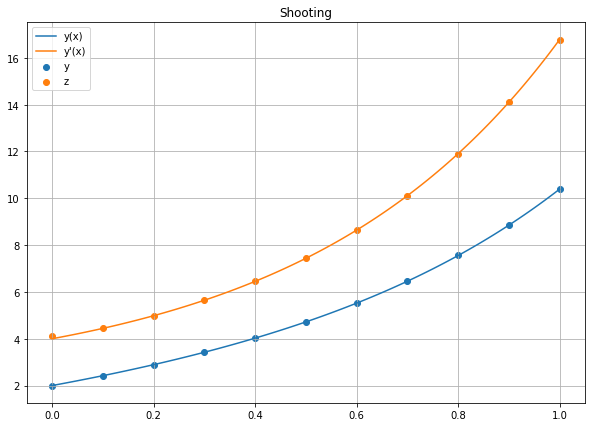

In [26]:
a = 0
b = 1
dx = 0.01

xarr = np.arange(a, b + dx, dx)
ylist = [f(x_) for x_ in xarr]
dylist = [dy(x_) for x_ in xarr]

plt.figure(figsize=(10,7))
plt.title('Shooting')
plt.plot(xarr, ylist)
plt.scatter(x1, y1)
plt.plot(xarr, dylist)
plt.scatter(x1, z1)
plt.legend(['y(x)', "y'(x)", 'y', 'z'])
plt.grid()
plt.show()

In [27]:
def p(x):
    return -(2 * x + 1) / x

def q(x):
    return 2 / x

def f_(x):
    return 0

In [28]:
def razn(p=p, q=q, f=f_, ya=2, yb=10.389, h=0.1, a=0, b=1):
    A = []
    B = []
    rows = []
    x = np.arange(a, b + h, h)
    
    n = len(x)
    
    for i in range(n):
        if i == 0:
            rows.append(1)
        else:
            rows.append(0)
    A.append(rows)
    B.append(ya)
    
    for i in range(1, n - 1):
        rows = []
        B.append(f(x[i]))
        for j in range(n):            
            if j == i - 1:
                rows.append(1 / h ** 2 - p(x[i]) / (2 * h))
            elif i == j:
                rows.append(-2 / h ** 2 + q(x[i]))
            elif j == i + 1:
                rows.append(1 / h ** 2 + p(x[i]) / (2 * h))
            else:
                rows.append(0)
        A.append(rows)
    
    rows = []
    B.append(yb)
    
    for i in range(n):
        if i == n - 1:
            rows.append(1)
        else:
            rows.append(0)
            
    A.append(rows)    
    y = Progonka(Matrix(A), B)
    
    return x, y

In [29]:
x1, y1 = razn()
eps1 = eps(x1, y1, f)
print("Погрешность конечно-разностного метода относительно точного решения: {}".format(eps1))
print()
x2, y2 = razn(h=0.05)
print("Погрешность по Рунге-Ромбергу-Ридчардсону конечно-разностного метода: {}".format(RRR(y1, y2, 0.1, 0.05, 2)))

Погрешность конечно-разностного метода относительно точного решения: 0.03159954675166293

Погрешность по Рунге-Ромбергу-Ридчардсону конечно-разностного метода: 0.007946128698370775


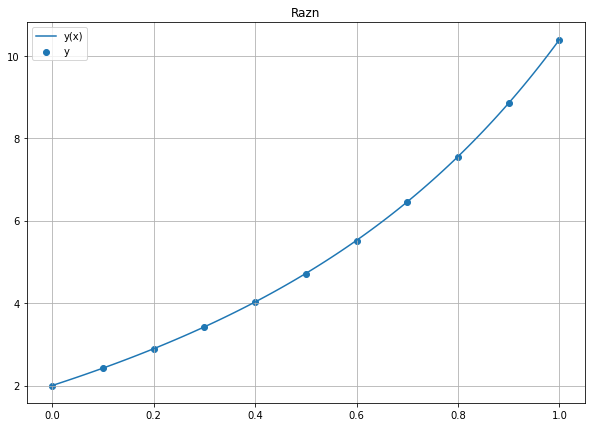

In [30]:
plt.figure(figsize=(10,7))
plt.title('Razn')
plt.plot(xarr, ylist)
plt.scatter(x1, y1)
plt.legend(['y(x)', 'y'])
plt.grid()
plt.show()